# Task

To recognise fradulent credit card transactions.

## Content

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset present transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are ‘Time’ and ‘Amount’. Feature ‘Time’ contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature ‘Amount’ is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature ‘Class’ is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Acknowlegements

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML.

In [1]:
#Import everyth functions and methods needed for this problem

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

In [3]:
#Read the data from the csv file

In [4]:
data = pd.read_csv("creditcard_csv.csv", sep = ",")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


As we can see the "Class" column is an object column. But it should be an integer column. I think it isn't big of a problem.

In [5]:
#Look at the data

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.891827e-12,-9.884878e-13,-5.139894e-13,1.253494e-12,5.842195e-14,3.608239e-13,4.918081e-13,-3.212882e-13,-8.510785e-13,...,-1.192419e-12,-3.211819e-13,9.454030e-14,8.163358e-13,-6.605292e-13,9.231872e-14,4.608328e-13,-1.250964e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Exploratory Data Analysis

In [8]:
#Check for null values

In [9]:
data.isna().values.any()

False

In [10]:
#There are no null values

In [11]:
#Let's check total number of normal and fraud transactions in our dataset using a plot

Text(0, 0.5, 'Transactions')

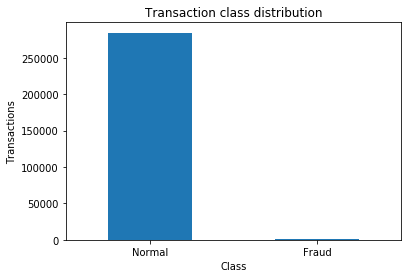

In [12]:
LABELS = ["Normal", "Fraud"]
class_count = pd.value_counts(data["Class"], sort = True)
class_count.plot(kind = "bar", rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Transactions")

In [13]:
normal = data[data["Class"] == 0]
fraud = data[data["Class"] == 1]

In [14]:
len(normal)

284315

In [15]:
len(fraud)

492

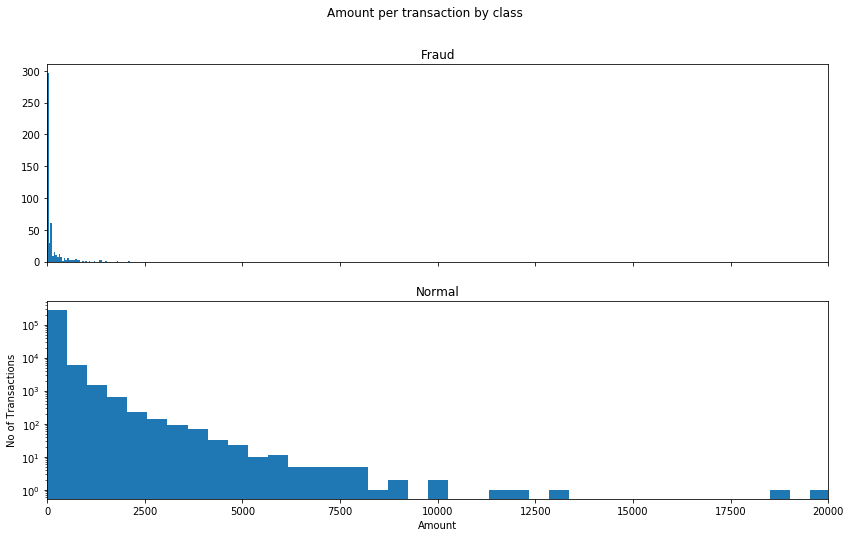

In [16]:
rcParams['figure.figsize'] = 14, 8
f, (f_axis, n_axis) = plt.subplots(nrows = 2, ncols = 1, sharex = True)
f.suptitle("Amount per transaction by class")
bins = 50
f_axis.hist(fraud.Amount, bins = bins)
f_axis.set_title("Fraud")
n_axis.hist(normal.Amount, bins = bins)
n_axis.set_title("Normal")
plt.xlabel("Amount")
plt.ylabel("No of Transactions")
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()


## Split a small amount of portion from the data

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in split.split(data, data["Class"]):
    data_small = data.loc[test_index]

In [19]:
data_small.shape

(28481, 31)

In [20]:
data.shape

(284807, 31)

In [21]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.891827e-12,-9.884878e-13,-5.139894e-13,1.253494e-12,5.842195e-14,3.608239e-13,4.918081e-13,-3.212882e-13,-8.510785e-13,...,-1.192419e-12,-3.211819e-13,9.454030e-14,8.163358e-13,-6.605292e-13,9.231872e-14,4.608328e-13,-1.250964e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [22]:
data_small.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,...,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000
mean,94808.139251,-0.007266,-0.001036,-0.013134,0.000904,0.005357,0.001527,0.000559,-0.003447,-0.001927,...,-0.004389,0.001765,-0.004068,-0.001682,0.005344,-0.002870,0.001147,0.001037,89.515200,0.001720
std,47543.377842,1.990182,1.725113,1.524881,1.414399,1.409828,1.361246,1.269627,1.217684,1.094719,...,0.721069,0.724183,0.618613,0.607489,0.522702,0.484735,0.402708,0.348415,260.806722,0.041443
min,2.000000,-37.558067,-42.172688,-24.962322,-5.231828,-40.427726,-19.996349,-28.215112,-50.688419,-9.481456,...,-22.757540,-6.320710,-22.459170,-2.807897,-4.547278,-1.577118,-9.845808,-8.412267,0.000000,0.000000
25%,54226.000000,-0.922077,-0.589457,-0.903715,-0.853650,-0.683809,-0.775610,-0.558124,-0.213413,-0.646837,...,-0.228236,-0.539917,-0.161956,-0.355693,-0.319740,-0.331239,-0.071189,-0.053348,5.490000,0.000000
50%,84629.000000,0.014786,0.070031,0.168246,-0.012253,-0.049980,-0.278868,0.038802,0.017596,-0.052814,...,-0.030049,0.008468,-0.012923,0.038963,0.022490,-0.058667,0.000982,0.011333,22.000000,0.000000
75%,139396.000000,1.315771,0.796804,1.022099,0.761594,0.620683,0.395552,0.570112,0.324476,0.594473,...,0.188158,0.531962,0.148940,0.441548,0.358032,0.237953,0.091011,0.080320,75.840000,0.000000
max,172786.000000,2.422508,15.536133,4.069865,11.474590,28.762671,23.917837,44.054461,14.116002,9.125535,...,16.666465,8.272233,15.879421,3.640662,7.519589,3.067907,10.507884,22.620072,12910.930000,1.000000


In [23]:
data1= data.sample(frac = 0.1,random_state=1)

In [24]:
data1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,...,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000
mean,94705.035216,-0.001143,-0.018290,0.000795,0.000350,-0.015666,0.003634,-0.008523,-0.003040,0.014536,...,0.004740,0.006719,-0.000494,-0.002626,-0.000917,0.004762,-0.001689,-0.004154,89.957884,0.001720
std,47584.727034,1.994661,1.709050,1.522313,1.420003,1.395552,1.334985,1.237249,1.204102,1.098006,...,0.744743,0.728209,0.645945,0.603968,0.520679,0.488171,0.418304,0.321646,270.894630,0.041443
min,0.000000,-40.470142,-63.344698,-31.813586,-5.266509,-42.147898,-19.996349,-22.291962,-33.785407,-8.739670,...,-16.640785,-10.933144,-30.269720,-2.752263,-7.025783,-2.534330,-8.260909,-9.617915,0.000000,0.000000
25%,53924.000000,-0.908809,-0.610322,-0.892884,-0.847370,-0.703986,-0.765807,-0.562033,-0.208445,-0.632488,...,-0.224842,-0.535877,-0.163047,-0.360582,-0.319611,-0.328476,-0.071712,-0.053379,5.980000,0.000000
50%,84551.000000,0.031139,0.051775,0.178943,-0.017692,-0.068037,-0.269071,0.028378,0.024696,-0.037100,...,-0.029075,0.014337,-0.012678,0.038383,0.015231,-0.049750,0.000914,0.010753,22.350000,0.000000
75%,139392.000000,1.320048,0.792685,1.035197,0.737312,0.603574,0.398839,0.559428,0.326057,0.621093,...,0.189068,0.533936,0.148065,0.434851,0.351466,0.253580,0.090329,0.076267,78.930000,0.000000
max,172784.000000,2.411499,17.418649,4.069865,16.715537,28.762671,22.529298,36.677268,19.587773,8.141560,...,22.588989,6.090514,15.626067,3.944520,5.541598,3.118588,11.135740,15.373170,19656.530000,1.000000


If we look closer the stratified data looks more like the original one than the sample data. 

In [25]:
Normal = data_small[data_small["Class"] == 0]
Fraud = data_small[data_small["Class"] == 1]
outlier_fraction = len(Fraud)/float(len(Normal))

len(Normal)

28432

In [26]:
len(Fraud)

49

In [27]:
outlier_fraction

0.0017234102419808666

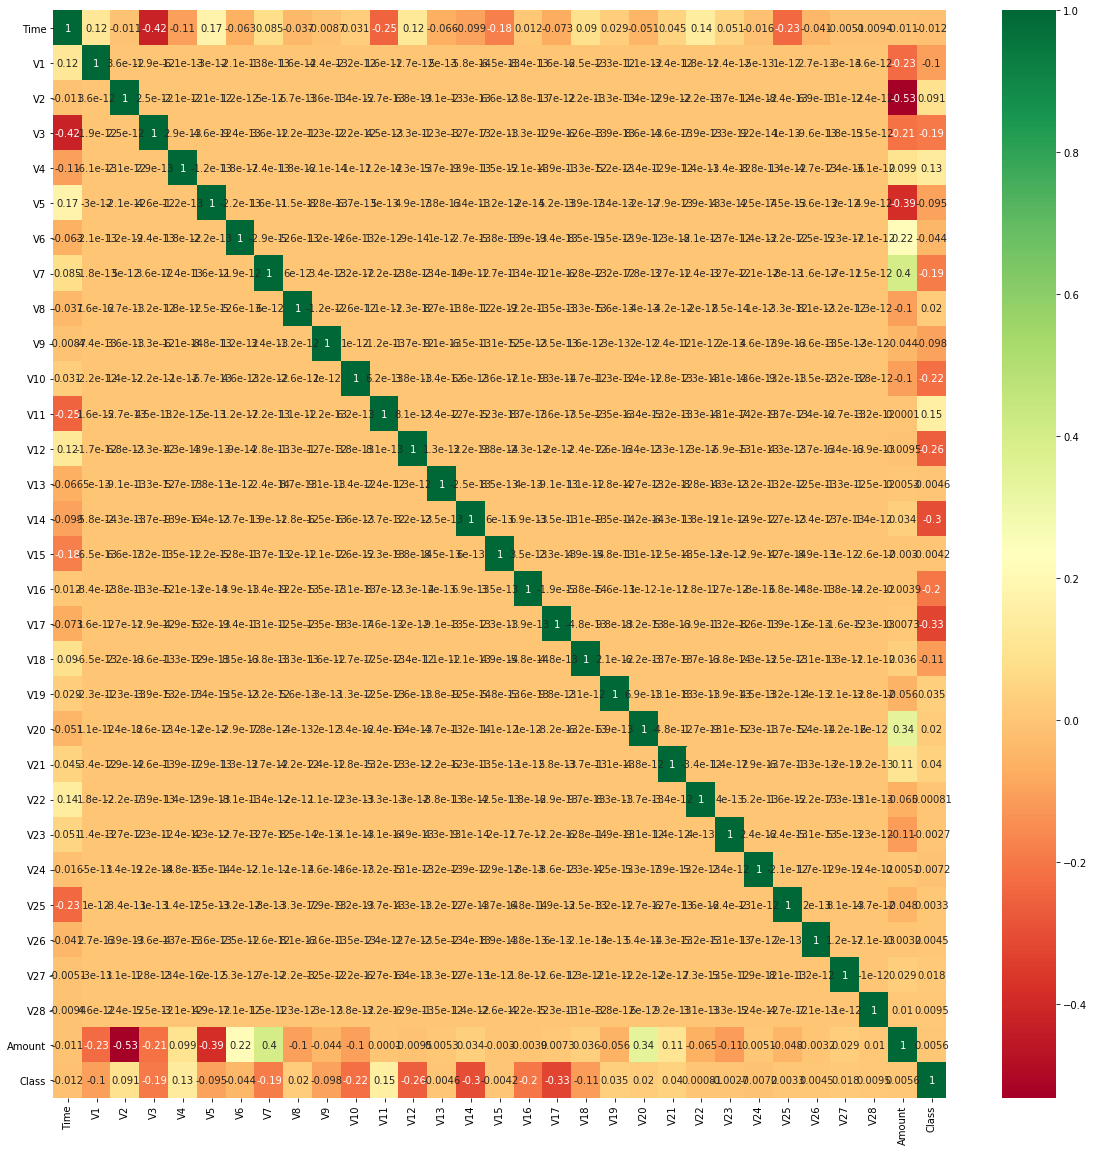

In [28]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data_small.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Split X and Y values

In [29]:
columns = data_small.columns.to_list()
columns = [c for c in columns if c != "Class"]
target = "Class"
X = data_small[columns]
Y = data_small[target]

In [30]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
121884,76355.0,1.177195,0.354835,-0.050112,0.996283,0.114707,-0.533672,0.323340,-0.039656,-0.440988,...,-0.232363,0.086546,0.269000,-0.093402,0.224293,0.697098,-0.294187,0.000146,-0.002305,1.00
150951,94213.0,1.929328,-0.230009,-0.722492,1.379370,0.327867,0.869605,-0.459958,0.156941,2.348205,...,-0.256200,-0.695468,-1.555905,0.254467,-1.599841,-0.225790,-1.074505,0.018082,-0.057300,34.99
8235,11058.0,1.245603,-0.063529,0.856232,0.336334,-0.916074,-0.863592,-0.496453,-0.153100,1.872207,...,-0.138715,-0.076642,-0.003412,-0.004729,0.377923,0.176246,1.034232,-0.095239,0.003889,15.95
211010,138219.0,-0.939001,1.082314,-0.267542,-1.106319,1.011555,-1.012780,1.054262,-0.143406,0.018528,...,-0.093108,-0.129332,-0.169412,-0.395748,-0.618097,-0.057835,-0.134543,-0.143480,-0.164164,0.01
246098,153033.0,-1.340880,0.364304,1.265265,-0.479915,-0.849015,0.489150,0.766527,0.619257,-0.378495,...,0.334137,0.060539,-0.415840,0.275328,-0.553855,0.380016,-0.401064,-0.136261,0.012904,231.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97370,66188.0,1.298034,0.583626,-0.603144,1.125589,0.353917,-0.746550,0.221369,-0.143223,0.107525,...,-0.134580,-0.116960,-0.303056,-0.213098,-0.600585,0.773576,-0.272034,0.025217,0.040758,1.00
176490,122792.0,-0.576468,1.726515,0.403589,4.280915,1.282501,0.121994,1.725724,-0.243746,-3.163243,...,0.149299,0.365068,0.997768,-0.643971,0.064092,1.025478,0.907515,-0.125869,0.058118,69.79
83538,59905.0,1.054477,0.088501,1.459097,1.342977,-0.927214,-0.217887,-0.497524,0.069591,0.266935,...,-0.044394,0.208879,0.691996,0.048674,0.631521,0.233502,-0.355898,0.085483,0.049124,27.07
235156,148274.0,0.191516,-0.320404,0.012047,-1.707050,0.301898,0.141932,0.203985,0.017883,-0.261222,...,0.054556,-0.032090,0.057703,0.135623,0.038466,-0.988335,-0.511627,0.250373,0.258195,36.78


In [31]:
Y

121884    0
150951    0
8235      0
211010    0
246098    0
         ..
97370     0
176490    0
83538     0
235156    0
16008     0
Name: Class, Length: 28481, dtype: int64

In [32]:
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


## Model Prediction

In [33]:
state = np.random.RandomState(42)
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "SVM":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
}

In [34]:
n_outliers = len(Fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1 
    n_errors = (y_pred != Y).sum()
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 71
Accuracy Score :
0.99750711000316
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 99
Accuracy Score :
0.9965239984551104
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        49

    accuracy                           1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481

SVM: 8425
Accuracy Score :
0.7041887574172255
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     28432
   

## Conclusion

- Isolation Forest detected 71 errors, Local Outlier Factor detected 99 errors and SVM detected 8425 errors.
- Isolation Forest has the maximum accuracy score of 99.75 % 
- Local Outlier Factor has an accuracy score of 99.65 %
- SVM has the lowest accuracy score of 70.41 %
- Hence Isolation Forest Outperformed both Local Outlier Factor and SVM algorithms.